# Lista de Exercícios 4: Modelagem e Identificação de Sistemas 

> Felipe Andrade Garcia Tommaselli- 11800910

> Gianluca Capezzuto Sardinha - 11876900

- Slide Aula 4: https://marofe.github.io/controle-digital/2024/aula4.html



# Atividade 1 

Nessa atividade, o objetivo é comparar diferentes métodos de discretização. 
Para isso, considere o seguinte exemplo:
$$
G(s) = \frac{s + 3}{(s + 1)(s + 2)}
$$

A função de transferência equivalente em tempo discreto pode ser computada usando o Matlab através da função `c2d` para os métodos degrau-invariante (zoh), impulso-invariante (impulse), mapeamento casado de polos e zeros (matched), método Bilinear (tustin) além de outros. (Dica: consulte a documentação do Matlab sobre discretização) https://www.mathworks.com/help/control/ug/continuous-discrete-conversion-methods.html

Por exemplo, o código a seguir obtém a FT em tempo discreto usando o método degrau-invariante, impulso-invariante, mapeamento casado de polos e zeros e método de tustin:

1. `close all` % fecha todas janelas  
2. `clear all` % limpa memória  
3. `clc` % limpa command window  
4. `%%`  
5. `num = [1 3];`  
6. `den = conv([1 1], [1 2]);`  
7. `G = tf(num, den);` % FT em tempo contínuo  
8. `T = 0.1;` % tempo de amostragem  
9. `Gd1 = c2d(G, T, 'zoh');` % obtém a FT discreta usando método degrau-invariante  
10. `Gd2 = c2d(G, T, 'impulse');` % obtém a FT discreta usando método impulso-invariante  
11. `Gd3 = c2d(G, T, 'matched');` % obtém a FT discreta usando método mapeamento casado de polos/zeros  
12. `Gd4 = c2d(G, T, 'tustin');` % obtém a FT discreta usando método bilinear (tustin)

Após obter a FT discretizada, pode-se comparar a resposta em frequência resultante de cada método de discretização usando o comando `bode`:

1. `figure`  
2. `bode(G, Gd1);`  
3. `title('ZOH');`  
4. `figure`  
5. `bode(G, Gd2);`  
6. `title('Impulse');`  
7. `figure`  
8. `bode(G, Gd3);`  
9. `title('Matched');`  
10. `figure`  
11. `bode(G, Gd4);`  
12. `title('Tustin');`

Seguindo a mesma lógica, encontre a FT discreta usando a função `c2d` e compare a resposta em frequência para os casos:

1. $$ G(s) = \frac{s}{(s + a)^2} $$  
2. $$ G(s) = \frac{s^2 + s + 1}{s^3 + 2s^2 + 3s + 2} $$  
3. $$ G(s) = \frac{s}{s^4 + 3s^2 + 2s + 1} $$

O que pode-se concluir através da análise da resposta em frequência para os diferentes métodos de discretização?


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, freqz, bode, cont2discrete


def create_discrete_systems(num, den, T):
    # Convertendo para o domínio discreto usando diferentes métodos
    Gd1 = cont2discrete((num, den), T, method='zoh')
    num_d1, den_d1, _ = Gd1

    Gd2 = cont2discrete((num, den), T, method='impulse')
    num_d2, den_d2, _ = Gd2

    Gd4 = cont2discrete((num, den), T, method='tustin')
    num_d4, den_d4, _ = Gd4

    # Discrete systems (ZOH, Impulse, Tustin)
    discrete_systems = [(num_d1, den_d1, 'ZOH'),
                        (num_d2, den_d2, 'Impulse'),
                        (num_d4, den_d4, 'Tustin')]
    
    return discrete_systems


In [48]:
def plot_bode(Gd, discrete_systems):
    w_cont, mag_cont, phase_cont = bode(Gd, n=8000)

    # Loop through each discrete system and pair it with the continuous system
    colors = ['red', 'green', 'orange']  # Colors for different discrete systems
    for i, (num_d, den_d, title) in enumerate(discrete_systems):

        num_d = num_d.flatten()  # Ensure num_d is 1D
        den_d = den_d.flatten()  # Ensure den_d is 1D

        # Calculate frequency response for the discrete system
        w_discrete, h_discrete = freqz(num_d, den_d, worN=8000)

        # Create a new figure for each pair of continuous and discrete systems
        plt.figure()

        # Magnitude plot: continuous (blue) and discrete (paired color)
        plt.subplot(2, 1, 1)
        plt.semilogx(w_cont, mag_cont, label='Continuous System', color='blue')  # Continuous system
        plt.plot(w_discrete, 20 * np.log10(np.abs(h_discrete)), label=f'{title} (Discrete)', color=colors[i])
        plt.title(f'Bode Plot: Continuous vs {title}')
        plt.ylabel('Magnitude [dB]')
        plt.grid(True)
        plt.legend()

        # Phase plot: continuous (blue) and discrete (paired color)
        plt.subplot(2, 1, 2)
        plt.semilogx(w_cont, phase_cont, label='Continuous System', color='blue')  # Continuous system
        plt.plot(w_discrete, np.angle(h_discrete, deg=True), label=f'{title} (Discrete)', color=colors[i])
        plt.ylabel('Phase [degrees]')
        plt.xlabel('Frequency [rad/s]')
        plt.grid(True)
        plt.legend()

    plt.show()

----------------------------------------------------------------------------------------------------


/tmp/ipykernel_40751/879434368.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_discrete, 20 * np.log10(np.abs(h_discrete)), label=f'{title} (Discrete)', color=colors[i])


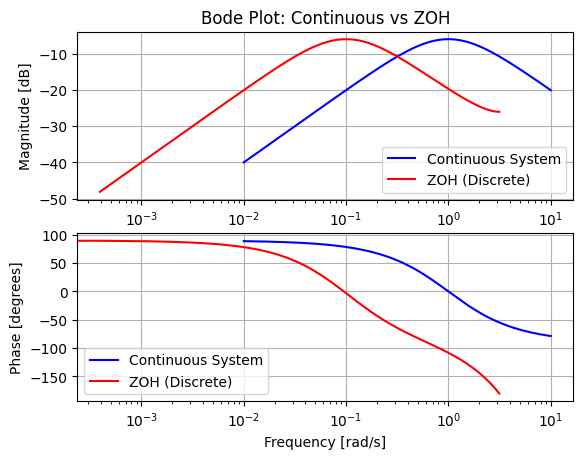

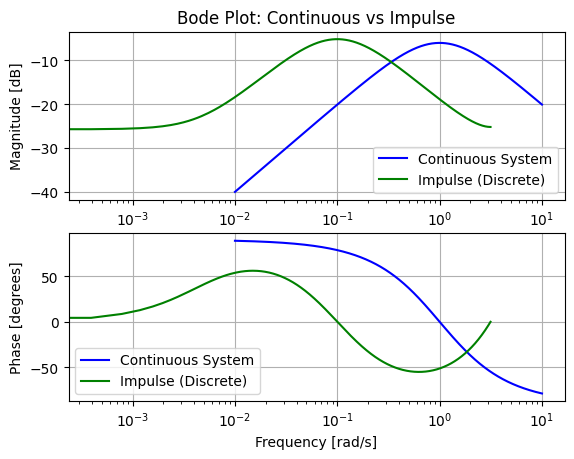

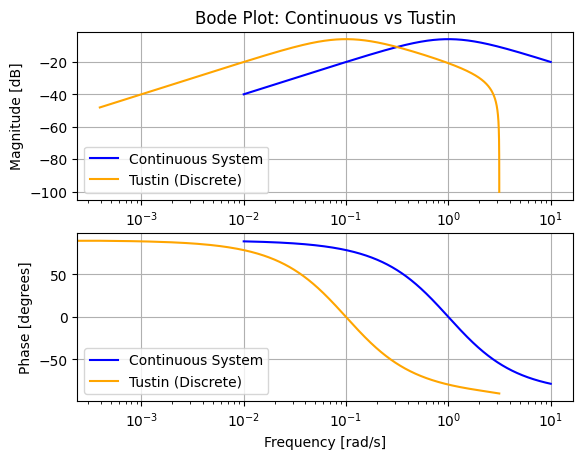

----------------------------------------------------------------------------------------------------


In [49]:
# Tempo de amostragem
T = 0.1

a = 1
num1 = np.array([1, 0])
den1 = np.convolve([1, a], [1, a])
Gd1 = lti(num1, den1)

num2 = np.array([1, 3])
den2 = np.convolve([1, 1], [1, 2])
Gd2 = lti(num2, den2)

num3 = np.array([1, 0])
den3 = np.array([1, 0, 3, 2, 1])
Gd3 = lti(num3, den3)

ds1 = create_discrete_systems(num1, den1, T)
ds2 = create_discrete_systems(num2, den2, T)
ds3 = create_discrete_systems(num3, den3, T)

print('-'*100)
plot_bode(Gd1, ds1)
print('-'*100)
plot_bode(Gd2, ds2)
print('-'*100)
plot_bode(Gd3, ds3)

## Atividade 2

Nessa atividade, o objetivo é usar o recurso de cálculo simbólico do Matlab para obter as FT equivalentes em tempo discreto. Para isso, considere o seguinte exemplo:

$$
G(s) = \frac{a}{s + a}
$$

Para o caso do método de Euler-Backward de discretização, pode-se implementar conforme o código de exemplo a seguir:

1. `close all` % fecha todas janelas  
2. `clear all` % limpa memória  
3. `clc` % limpa command window  
4. `%%`  
5. `syms s z T` % define variáveis simbólicas  
6. `G = a / (s + a);` % monta FT em tempo contínuo  
7. `Gd = subs(G, 's', (z - 1) / (z * T));` % obtém FT discreta via substituição  
8. `pretty(Gd);` % mostra FT de forma "bonita"  

Seguindo a mesma lógica, encontre a FT em tempo discreto usando os métodos de Euler-Forward e Euler-Backward dos seguintes casos:

1. $$ G(s) = \frac{1}{s^2} $$  
2. $$ G(s) = \frac{s + 2}{(s + 1)(s + 5)} $$  
3. $$ G(s) = \frac{s + 3}{s^2 (s + 1)(s - 9)} $$  


## Atividade 3

Nessa atividade, o objetivo é comparar o método de discretização impulso-invariante e degrau-invariante. Para isso, considere a FT a seguir como exemplo:

$$
G(s) = \frac{s + 3}{s^2 + s + 1}
$$

Usando o seguinte código, obtém-se a resposta ao degrau e ao impulso tanto em tempo contínuo quanto em tempo discreto:

1. `close all`  
2. `clear all`  
3. `clc`  
4. `G = tf([1 3], [1 1 1]);` % FT em tempo contínuo  
5. `dt = 0.001;` % amostragem contínua  
6. `t = 0:dt:10;` % vetor de tempo contínuo  
7. `[yu, t] = step(G, t);` % resposta ao degrau em tempo contínuo  
8. `[yi, t] = impulse(G, t);` % resposta ao impulso em tempo contínuo  
9. `T = 0.5;` % tempo de amostragem discreta  
10. `Gd1 = c2d(G, T, 'zoh');` % obtém a FT discreta usando método degrau-invariante  
11. `Gd2 = c2d(G, T, 'impulse');` % obtém a FT discreta usando método impulso-invariante  
12. `td = 0:T:10;` % vetor de tempo discreto  
13. `[ydu1, td] = step(Gd1, td);` % resposta ao degrau  
14. `[ydu2, td] = step(Gd2, td);` % resposta ao degrau  
15. `[ydi1, td] = impulse(Gd1, td);` % resposta ao impulso  
16. `[ydi2, td] = impulse(Gd2, td);` % resposta ao impulso  
17. `figure`  
18. `plot(t, yu, 'LineWidth', 1.5);`  
19. `hold on;`  
20. `stairs(td, ydu1, 'LineWidth', 1.5);`  
21. `stairs(td, ydu2, 'LineWidth', 1.5);`  
22. `figure`  
23. `plot(t, yi, 'LineWidth', 1.5);`  
24. `hold on;`  
25. `stairs(td, ydi1, 'LineWidth', 1.5);`  
26. `stairs(td, ydi2, 'LineWidth', 1.5);`  

Seguindo a mesma lógica, compare os métodos de discretização degrau-invariante e impulso-invariante para a seguinte função de transferência com $T = 0.1s$ e $t \in [0, 5]$:

$$
G(s) = \frac{(s + 2)(s + 1)}{(s + 5)(s + 3)(s + 7)}
$$

O que pode-se observar em relação às respostas temporais dos dois métodos de discretização para as entradas em degrau e impulso?


## Atividade 4

O objetivo dessa prática é obter a equação a diferenças para uma dada equação diferencial fazendo discretização usando os recursos do Matlab. 

Para isso, considere uma equação de primeira ordem na forma:

$$
\frac{dy}{dt} + y = u(t)
$$

A função de transferência associada a essa EDO é:

$$
G(s) = \frac{1}{s + 1}
$$

Pode-se obter a FT equivalente em tempo discreto usando o método de degrau-invariante no Matlab através do seguinte código:

1. `close all` % fecha todas as janelas  
2. `clear all` % limpa memória  
3. `clc` % limpa command window  
4. `%%`  
5. `G = tf(1, [1 1]);` % FT em tempo contínuo  
6. `T = 0.1;` % tempo de amostragem  
7. `Gd1 = c2d(G, T, 'zoh');` % obtém a FT discreta usando método degrau-invariante  

O que resulta em:

$$
G_d(z) = \frac{0.09516}{z - 0.9048} = \frac{0.09516z^{-1}}{1 - 0.9048z^{-1}}
$$

Portanto, como $G_d(z) = \frac{Y_d(z)}{U_d(z)}$, tem-se a equação a diferenças associada dada por:

$$
y[k] = 0.9048y[k - 1] + 0.09516u[k - 1]
$$

Além disso, essa equação a diferenças pode ser implementada usando estrutura de repetição `for` conforme exemplo a seguir:

1. `td = 0:T:5-T;`  
2. `y = zeros(size(td));`  
3. `u = ones(size(td));`  
4. `for k = 2:50`  
5. &nbsp;&nbsp;&nbsp;&nbsp;`y(k) = 0.9048*y(k-1) + 0.09516*u(k-1);`  
6. `end`  
7. `figure`  
8. `stairs(td, u, 'LineWidth', 1.5);`  
9. `hold on;`  
10. `stairs(td, y, 'LineWidth', 1.5);`

Seguindo a mesma lógica, encontre as equações a diferenças associadas às seguintes EDOs e plote as 50 primeiras amostras em tempo discreto. Considere $T = 0.1s$.

1. 
$
2\frac{d^2y}{dt^2} + 3\frac{dy}{dt} + 5y = \frac{du}{dt} + 2u, \quad y(0) = 0, \quad \frac{dy(0)}{dt} = 0
$

2.
$
\frac{d^2y}{dt^2} + y = \frac{du}{dt}, \quad y(0) = 0, \quad \frac{dy(0)}{dt} = 0
$


## Atividade 5

Considere o circuito RC apresentado na **Figura 1** cuja representação em diagrama de blocos é apresentada na **Figura 2**.

**Figura 1**: Circuito RC.  
**Figura 2**: Circuito RC em diagrama de blocos.

1. Obtenha a função de transferência para o circuito RC:  
$$
G(s) = \frac{V_o(s)}{V_i(s)}
$$

2. Discretize a função de transferência \( G(s) \) usando o método de Tustin com período de amostragem \( T = 0.01s \), \( R = 1 \), e \( C = 1 \).

3. Compare a resposta ao degrau do sistema contínuo e discreto.

4. Compare a resposta ao impulso do sistema contínuo e discreto.

5. Compare a resposta em frequência do sistema contínuo e discreto.

6. Usando a FT discretizada \( G_d(z) \), obtenha a respectiva equação a diferenças:

A equação a diferenças é dada por:

$$
y[k] = a_1y[k-1] + b_1u[k-1]
$$

Onde \( a_1 \) e \( b_1 \) são obtidos a partir da discretização da função de transferência.

7. Usando a equação a diferenças, simule uma entrada PRBS (um exemplo de sinal PRBS está disponível no e-disciplina).
